# Trying out PCA with Support Vector Machine and Linear Regression

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

#### import a data set with many features to apply PCA (dimession reduction)

In [5]:
from sklearn.datasets import load_breast_cancer

In [10]:
cancer = load_breast_cancer()

In [11]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [8]:
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

In [9]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
#The target key of the data set is out classification of each entry point
print(cancer['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [28]:
# 0 for malignant and 1 for benign
print(cancer['target_names'])

['malignant' 'benign']


## PCA

In [15]:
from sklearn.preprocessing import StandardScaler

In [17]:
#scaling the data
scaler = StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)

#scaled_data

In [18]:
from sklearn.decomposition import PCA

In [19]:
pca = PCA(n_components=2)

In [20]:
pca.fit(scaled_data)

PCA(n_components=2)

In [21]:
# transform this data to its first 2 principal components
x_pca = pca.transform(scaled_data)

In [23]:
#check dimmensions: 569 entries with 2 components (not linealry related to the origianl features).
x_pca.shape

(569, 2)

In [25]:
scaled_data.shape #30 features

(569, 30)

In [31]:
#pca.components_ in relation to original data features.
df_comp = pd.DataFrame(pca.components_,columns=cancer['feature_names'])
df_comp

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


Text(0, 0.5, 'Second Principal Component')

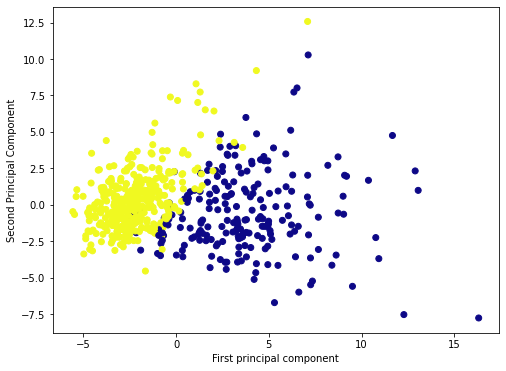

In [30]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

<AxesSubplot:>

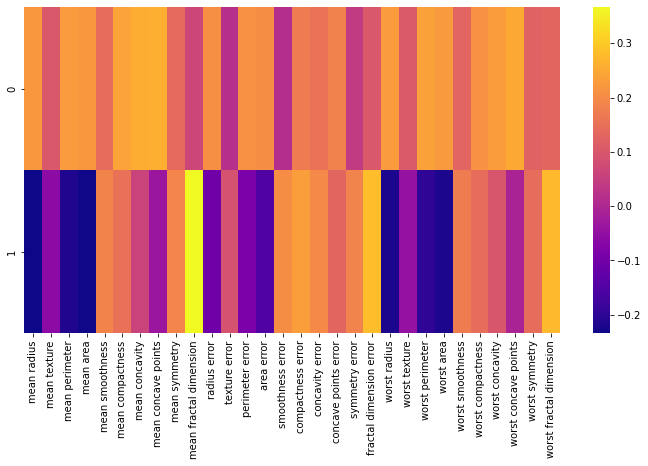

In [33]:
#We can see the weight for the features reduction into 2 components in a heat map. 
#Features with more variability vs features with less variability.

plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma')

## Prepare the data to test with SVM and LR

In [27]:
#split data sets for my machine learning models
from sklearn.model_selection import train_test_split

In [29]:
X_pca = x_pca
X_scaled = scaled_data

y = cancer['target']

X_pca_train, X_pca_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=101)
X_scaled_train, X_scaled_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=101)

## SVM

In [36]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix

In [37]:
model = SVC()

In [38]:
#fit and pred for PCA 2 components
model.fit(X_pca_train,y_train)
predictions = model.predict(X_pca_test)

print(confusion_matrix(y_test,predictions))
print("/n")
print(classification_report(y_test,predictions))

[[ 56  10]
 [  5 100]]
/n
              precision    recall  f1-score   support

           0       0.92      0.85      0.88        66
           1       0.91      0.95      0.93       105

    accuracy                           0.91       171
   macro avg       0.91      0.90      0.91       171
weighted avg       0.91      0.91      0.91       171



In [39]:
#fit and pred for data with all features
model.fit(X_scaled_train,y_train)
predictions = model.predict(X_scaled_test)

print(confusion_matrix(y_test,predictions))
print("/n")
print(classification_report(y_test,predictions))

[[ 63   3]
 [  1 104]]
/n
              precision    recall  f1-score   support

           0       0.98      0.95      0.97        66
           1       0.97      0.99      0.98       105

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.98       171
weighted avg       0.98      0.98      0.98       171



## Linear Regression

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [44]:
lm = LinearRegression()

MAE: 0.22528110608416654
MSE: 0.08329048007526385
RMSE: 0.2886009010298891


C:\Users\migue\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


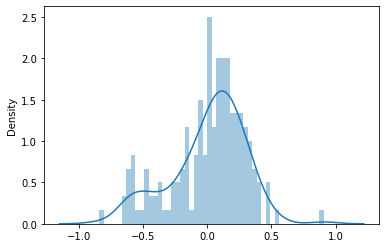

In [51]:
#fit and pred for PCA 2 components
lm.fit(X_pca_train,y_train)
predictions = lm.predict(X_pca_test)

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


sns.distplot((y_test-predictions),bins=50);

MAE: 0.2172051786911134
MSE: 0.08060252600358703
RMSE: 0.2839058400307874


C:\Users\migue\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


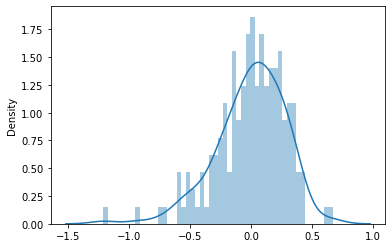

In [52]:
#fit and pred for data with all features
lm.fit(X_scaled_train,y_train)
predictions = lm.predict(X_scaled_test)

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

sns.distplot((y_test-predictions),bins=50);

# CONCLUSION

In conclusion, we applied Principal Component Analysis (PCA) for dimensionality reduction on the breast cancer dataset and compared the performance of Support Vector Machine (SVM) and Linear Regression (LR) models on the reduced data with 2 principal components and the original dataset with all features.

The SVM model demonstrated strong performance on both the PCA-reduced data and the original dataset, with a slight improvement in the classification report for the original dataset. This indicates that SVM is an effective classifier for the breast cancer dataset, and PCA can help reduce computation time without compromising the accuracy significantly.

On the other hand, the Linear Regression model showed a considerable difference in performance between the PCA-reduced data and the original dataset. The mean absolute error (MAE), mean squared error (MSE), and root mean squared error (RMSE) were all higher for the PCA-reduced data compared to the original dataset, suggesting that the LR model is more sensitive to the loss of information during dimensionality reduction.

In summary, PCA can be a valuable preprocessing step for certain machine learning models like SVM when dealing with high-dimensional data. However, it may not be suitable for all models, as the information loss during dimensionality reduction can impact the performance of models like Linear Regression. Further exploration and experimentation with other dimensionality reduction techniques, machine learning models, and hyperparameter tuning can help improve the overall performance and understanding of the most suitable approach for this dataset.